<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/knnclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#import platform
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

%matplotlib inline

In [95]:
tel_df_copy = pd.read_csv('/content/sample_data/Cleaned_Telecom_Dataset.csv', index_col=0)
tel_df_copy.shape

(7032, 51)

In [96]:
tel_df_copy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [97]:
tel_df_copy.tail()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
7038,0,84.80,1990.50,0,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,False,False
7039,0,103.20,7362.90,0,True,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
7040,0,29.60,346.45,0,True,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False
7041,1,74.40,306.60,1,False,True,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
7042,0,105.65,6844.50,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [98]:
tel_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   Partner_No                               7032 non-null   bool   
 7   Partner_Yes                              7032 non-null   bool   
 8   Dependents_No                            7032 non-null   bool   
 9   Dependents_Yes                           7032 non-null   bool   
 10  PhoneService_No                          7032 non-nul

Feature selection

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tel_df_copy.drop(['Churn'],axis = 1))
scaled_features = scaler.transform(tel_df_copy.drop('Churn',axis = 1))

In [100]:
X = scaled_features
Y = tel_df_copy['Churn']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [101]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [102]:
pred_knn = knn.predict(X_test)

In [103]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

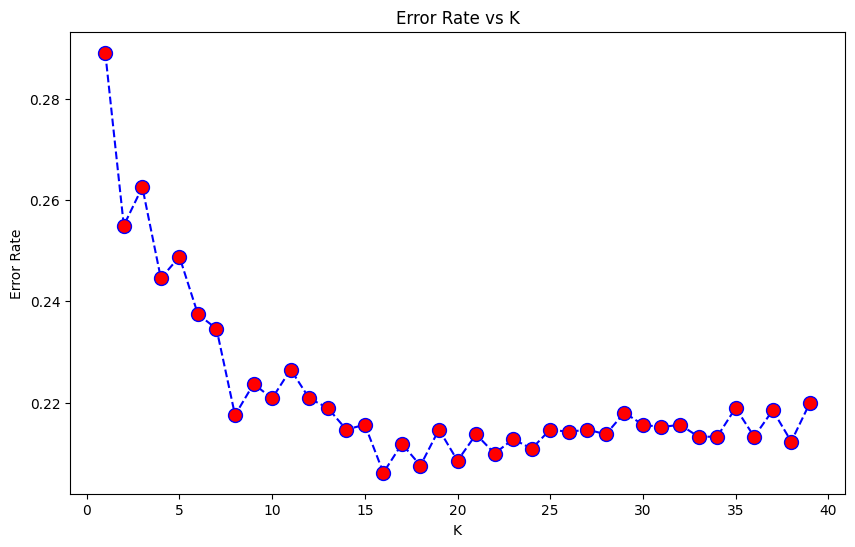

In [104]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
print(classification_report(Y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1534
           1       0.61      0.59      0.60       576

    accuracy                           0.78      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.78      0.78      0.78      2110



In [106]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

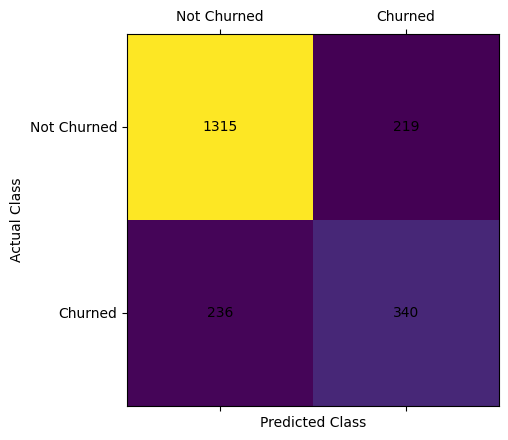

In [107]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [108]:
knn.score(X_train,Y_train)

0.7966273872409589

In [109]:
accuracy_score(Y_test, pred_knn)

0.7843601895734598